In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

%matplotlib inline
mpl.rcParams['axes.unicode_minus'] = False

plt.rcParams["font.family"] ='NanumGothic'

In [2]:
df_origin = pd.read_csv('군집분석.csv', encoding='euc-kr')
df_origin

,Unnamed: 0,업무건물,영업건물,주거건물,대중집합건물,기타건물,대전지하철역,사고량,타슈이용량,총이용승객,정류장개수,경제인구수,교통량,하천여부,cluster
0,1,1,1,1,6,1,0,0,7727,113755,5,228,361160,1,1
1,2,2,1,1,6,1,0,0,10660,293801,6,508,361160,1,1
2,3,1,1,1,8,1,0,0,53185,0,0,0,0,0,0
3,4,13,38,32,2,1,0,0,11007,1862557,2,5271,1853738,0,4
4,5,1,1,10,5,1,0,0,9109,87367,2,726,522884,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,258,12,1,1,1,1,0,0,2199,131031,2,0,0,0,0
258,259,8,1,1,1,1,0,0,3210,323753,2,0,0,0,0
259,260,2,138,76,1,25,0,7,4465,1074721,5,751,1793346,1,1
260,261,1,5,11,1,1,0,0,1866,17757,4,346,696365,0,0


In [3]:
df_origin = df_origin.set_index('Unnamed: 0')
df_origin = df_origin.drop(['영업건물', '정류장개수'], axis=1)
df = df_origin[['주거건물', '기타건물', '총이용승객', '경제인구수', '하천여부', 'cluster']]

In [ ]:
df

In [4]:
df['cluster'].value_counts()

2    67
0    49
3    49
4    47
1    28
5    13
6     9
Name: cluster, dtype: int64

In [5]:
cluster_g = df_origin.groupby('cluster')
cluster_g.mean()

,업무건물,주거건물,대중집합건물,기타건물,대전지하철역,사고량,타슈이용량,총이용승객,경제인구수,교통량,하천여부
cluster,,,,,,,,,,,
0,8.081633,33.979592,2.979592,5.387755,0.122449,0.000000,5989.265306,2.811935e+05,736.612245,5.915362e+05,0.0
1,2.392857,26.428571,3.928571,6.285714,0.000000,0.250000,5555.964286,3.401473e+05,822.357143,1.086557e+06,1.0
2,7.537313,134.164179,7.223881,3.597015,0.119403,0.940299,3481.388060,8.493797e+05,2771.014925,1.090176e+06,0.0
3,5.673469,428.000000,9.040816,6.530612,0.061224,0.877551,2871.938776,8.405642e+05,2958.591837,1.657521e+06,0.0
4,6.319149,108.553191,3.297872,1.617021,0.085106,0.765957,4437.574468,7.642289e+05,6029.212766,6.389216e+05,0.0
5,2.615385,296.923077,7.923077,3.692308,0.153846,0.000000,6451.230769,5.112416e+05,3392.615385,1.146942e+06,1.0
6,16.000000,79.777778,18.000000,4.333333,0.444444,5.444444,9419.222222,5.602891e+06,1817.555556,1.190460e+06,0.0


In [6]:
from sklearn.preprocessing import MinMaxScaler

X = df_origin.drop(['cluster'], axis=1)
y = df_origin['cluster']

scaler = MinMaxScaler().fit(X)
Xscaled = scaler.transform(X)

df_scaled = pd.DataFrame(data=Xscaled, columns=X.columns.to_list())
df_scaled[y.name] = y.values
df_scaled.head()

,업무건물,주거건물,대중집합건물,기타건물,대전지하철역,사고량,타슈이용량,총이용승객,경제인구수,교통량,하천여부,cluster
0,0.000000,0.000000,0.072464,0.0,0.0,0.0,0.140973,0.013648,0.023418,0.050145,1.0,1
1,0.022727,0.000000,0.072464,0.0,0.0,0.0,0.196398,0.035249,0.052177,0.050145,1.0,1
2,0.000000,0.000000,0.101449,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.0,0
3,0.272727,0.040365,0.014493,0.0,0.0,0.0,0.202956,0.223464,0.541393,0.257379,0.0,4
4,0.000000,0.011719,0.057971,0.0,0.0,0.0,0.167089,0.010482,0.074569,0.072599,0.0,0


In [7]:
df_scaled.groupby('cluster').std()

,업무건물,주거건물,대중집합건물,기타건물,대전지하철역,사고량,타슈이용량,총이용승객,경제인구수,교통량,하천여부
cluster,,,,,,,,,,,
0,0.190424,0.064957,0.059864,0.154216,0.331201,0.000000,0.178265,0.038047,0.077141,0.113052,0.0
1,0.054398,0.057030,0.089854,0.214744,0.000000,0.069625,0.095071,0.055723,0.092666,0.152320,0.0
2,0.212625,0.103112,0.189883,0.062269,0.326709,0.142197,0.053208,0.090370,0.084491,0.174140,0.0
3,0.108242,0.158439,0.108088,0.123406,0.242226,0.164564,0.036216,0.074383,0.114298,0.230029,0.0
4,0.120084,0.113765,0.076743,0.027237,0.282057,0.100710,0.055616,0.065367,0.139595,0.088677,0.0
5,0.036574,0.206908,0.143649,0.049636,0.375534,0.000000,0.076814,0.062559,0.194811,0.160987,0.0
6,0.230096,0.160029,0.174666,0.086533,0.527046,0.295524,0.078614,0.243676,0.127690,0.097417,0.0


In [8]:
df_scaled.groupby('cluster').mean()

,업무건물,주거건물,대중집합건물,기타건물,대전지하철역,사고량,타슈이용량,총이용승객,경제인구수,교통량,하천여부
cluster,,,,,,,,,,,
0,0.160946,0.042942,0.028690,0.057734,0.122449,0.000000,0.108135,0.033737,0.075659,0.082131,0.0
1,0.031656,0.033110,0.042443,0.069549,0.000000,0.013158,0.099946,0.040810,0.084466,0.150861,1.0
2,0.148575,0.173391,0.090201,0.034171,0.119403,0.049489,0.060743,0.101906,0.284615,0.151363,0.0
3,0.106215,0.555990,0.116534,0.072771,0.061224,0.046187,0.049226,0.100848,0.303882,0.230135,0.0
4,0.120890,0.140043,0.033302,0.008119,0.085106,0.040314,0.078812,0.091690,0.619270,0.088710,0.0
5,0.036713,0.385317,0.100334,0.035425,0.153846,0.000000,0.116864,0.061337,0.348461,0.159245,1.0
6,0.340909,0.102575,0.246377,0.043860,0.444444,0.286550,0.172951,0.672219,0.186684,0.165287,0.0


In [ ]:
# plt.rcParams["font.family"] ='NanumGothic'
# sns.pairplot(df, diag_kind='kde', hue='cluster')
# sns.set(font_scale = 2)
# plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.war

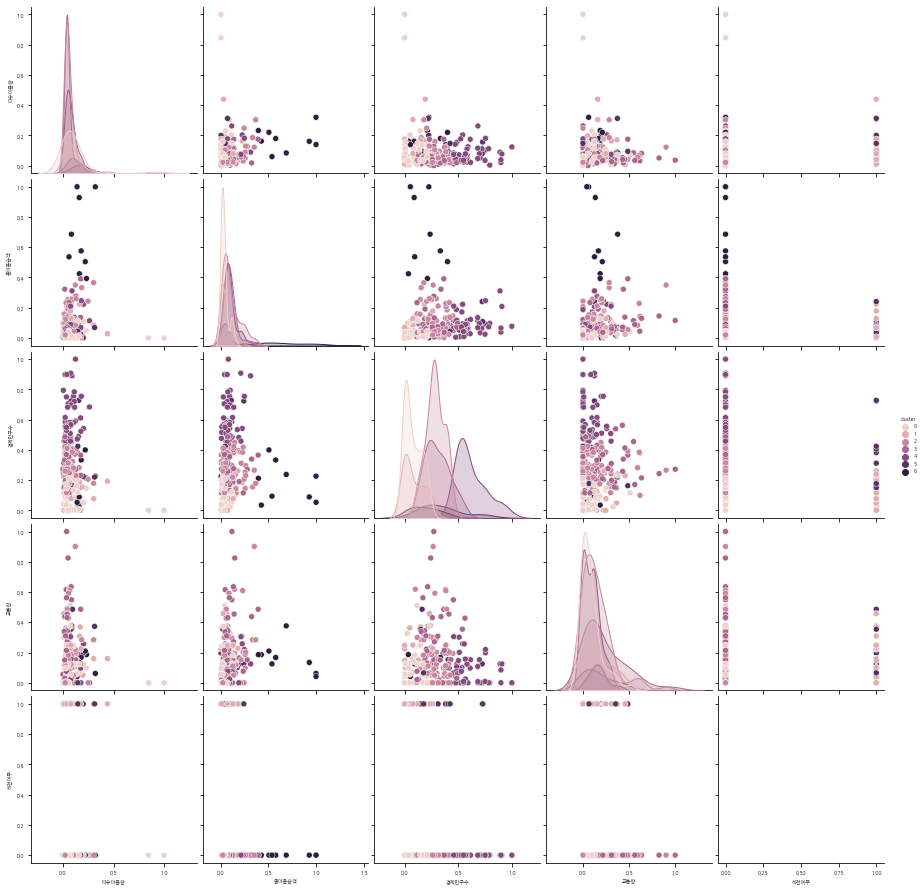

In [9]:
plt.rcParams["font.family"] ='NanumGothic'
plt.rcParams["font.size"] = 5
sns.pairplot(df_scaled[['타슈이용량', '총이용승객', '경제인구수' ,'교통량', '하천여부', 'cluster']], diag_kind='kde', hue='cluster')
sns.set(font_scale = 1)
plt.show()

In [ ]:
# 사고량	타슈이용량	총이용승객	경제인구수	교통량	하천여부

In [10]:
df0 = df_origin[df_origin['cluster']==0]
df1 = df_origin[df_origin['cluster']==1]

In [11]:
df0

,업무건물,주거건물,대중집합건물,기타건물,대전지하철역,사고량,타슈이용량,총이용승객,경제인구수,교통량,하천여부,cluster
Unnamed: 0,,,,,,,,,,,,
3,1,1,8,1,0,0,53185,0,0,0,0,0
5,1,10,5,1,0,0,9109,87367,726,522884,0,0
7,14,10,1,1,0,0,4602,1245047,1539,966502,0,0
18,25,1,1,1,1,0,7694,865531,864,0,0,0
21,23,1,1,1,0,0,5081,0,8,0,0,0
22,21,1,1,1,0,0,4661,0,0,0,0,0
24,12,3,1,1,0,0,3989,0,0,443618,0,0
25,17,1,1,1,0,0,3533,82342,0,0,0,0
26,4,1,3,1,0,0,2847,160132,112,887236,0,0


In [12]:
df0.corr()

,업무건물,주거건물,대중집합건물,기타건물,대전지하철역,사고량,타슈이용량,총이용승객,경제인구수,교통량,하천여부,cluster
업무건물,1.000000,-0.323424,0.041585,-0.146501,0.086413,NaN,-0.080456,0.090381,-0.205871,-0.364964,NaN,NaN
주거건물,-0.323424,1.000000,0.324635,0.143751,0.340599,NaN,-0.167013,0.389921,0.244925,0.496885,NaN,NaN
대중집합건물,0.041585,0.324635,1.000000,0.128835,-0.104733,NaN,0.257848,0.251425,0.026121,-0.000637,NaN,NaN
기타건물,-0.146501,0.143751,0.128835,1.000000,-0.103724,NaN,-0.167079,0.085567,-0.194160,0.019463,NaN,NaN
대전지하철역,0.086413,0.340599,-0.104733,-0.103724,1.000000,NaN,-0.012880,0.467656,0.189980,0.394993,NaN,NaN
사고량,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
타슈이용량,-0.080456,-0.167013,0.257848,-0.167079,-0.012880,NaN,1.000000,-0.111985,-0.162069,-0.160061,NaN,NaN
총이용승객,0.090381,0.389921,0.251425,0.085567,0.467656,NaN,-0.111985,1.000000,0.315113,0.269207,NaN,NaN
경제인구수,-0.205871,0.244925,0.026121,-0.194160,0.189980,NaN,-0.162069,0.315113,1.000000,0.235326,NaN,NaN
교통량,-0.364964,0.496885,-0.000637,0.019463,0.394993,NaN,-0.160061,0.269207,0.235326,1.000000,NaN,NaN


In [ ]:
df1.corr()

In [ ]:
df6 = df_origin[df_origin['cluster']==6]

In [ ]:
df6.corr()

In [ ]:
df3 = df_origin[df_origin['cluster']==3]
df3.corr()

In [ ]:
df4 = df_origin[df_origin['cluster']==4]
df4.corr()

In [14]:
df6 = df_origin[df_origin['cluster']==6]
cor = df6[['업무건물', '주거건물', '대중집합건물', '기타건물', '대전지하철역', '사고량', '총이용승객', '경제인구수', '교통량', '타슈이용량']].corr()
cor

,업무건물,주거건물,대중집합건물,기타건물,대전지하철역,사고량,총이용승객,경제인구수,교통량,타슈이용량
업무건물,1.000000,-0.505509,-0.466124,-0.642068,0.093704,0.046176,0.088673,-0.059886,-0.178024,0.689916
주거건물,-0.505509,1.000000,-0.021435,0.192027,-0.287748,-0.466082,0.134780,0.034226,0.685957,-0.575129
대중집합건물,-0.466124,-0.021435,1.000000,0.039427,0.157432,0.236437,0.362918,0.379917,-0.244687,-0.006741
기타건물,-0.642068,0.192027,0.039427,1.000000,-0.264466,-0.427650,-0.067689,-0.340787,-0.170452,-0.649800
대전지하철역,0.093704,-0.287748,0.157432,-0.264466,1.000000,0.305060,0.233965,-0.438446,-0.321007,-0.151699
사고량,0.046176,-0.466082,0.236437,-0.427650,0.305060,1.000000,-0.195008,0.519948,-0.170931,0.451911
총이용승객,0.088673,0.134780,0.362918,-0.067689,0.233965,-0.195008,1.000000,-0.249481,-0.487176,0.166373
경제인구수,-0.059886,0.034226,0.379917,-0.340787,-0.438446,0.519948,-0.249481,1.000000,0.371732,0.393263
교통량,-0.178024,0.685957,-0.244687,-0.170452,-0.321007,-0.170931,-0.487176,0.371732,1.000000,-0.355723
타슈이용량,0.689916,-0.575129,-0.006741,-0.649800,-0.151699,0.451911,0.166373,0.393263,-0.355723,1.000000


In [19]:
cor.drop('타슈이용량', axis=1).transpose().loc[:, ["타슈이용량"]].sort_values(by="타슈이용량",ascending=False)

,타슈이용량
업무건물,0.689916
사고량,0.451911
경제인구수,0.393263
총이용승객,0.166373
대중집합건물,-0.006741
대전지하철역,-0.151699
교통량,-0.355723
주거건물,-0.575129
기타건물,-0.649800


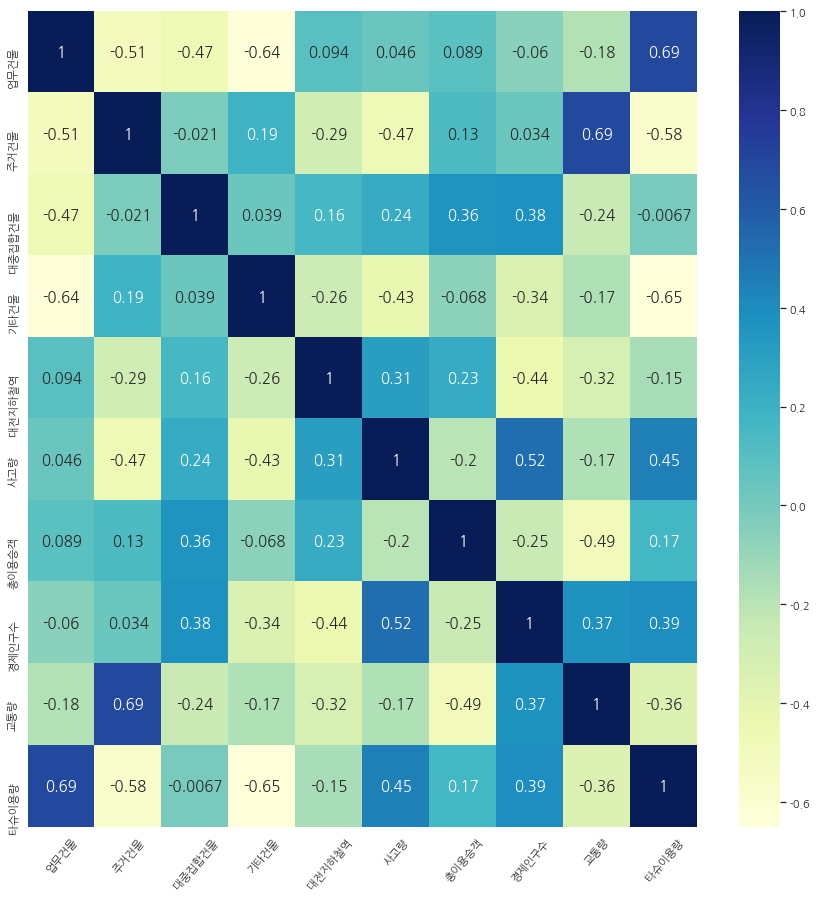

In [16]:
plt.rcParams["font.family"] ='NanumGothic'
plt.rcParams["font.size"] = 15
fig, ax = plt.subplots(figsize = (15, 15))
ax = sns.heatmap(cor, annot=True, cmap='YlGnBu')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 50)
sns.set(font_scale = 2)
plt.show()